# MONET-analysis dev 

First lets just import the driver to see how it happens and so we can play around with it a little 

In [1]:
import sys
sys.path.append('../../')
import driver

/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_default/lib/python3.6/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


Please install h5py to open files from the Amazon S3 servers.
Please install h5netcdf to open files from the Amazon S3 servers.


### Driver class

Now lets create an instance of the python driver analysis class. It consists of 4 main parts; model instances, observation instances, a paired instance of both.  This will allow us to move things around the plotting function for spatial and overlays and more complex plots.

In [2]:
an = driver.analysis()

### Control File

set the yaml control file and begin by reading the file

In [3]:
an.control = '../yaml/control_cmaq.yaml'
an.read_control() # control='control.yaml')
an.control_dict

{'analysis': {'start_time': '2019-08-02-12:00:00',
  'end_time': '2019-08-03-12:00:00',
  'output_dir': '/scratch2/BMC/rcm1/rhs/wrfchem/processed/run_CONUS_fv19_BEIS_1.0xISO_RACM_v4.2.2_racm_vcp_noI/0802_w_cmaq',
  'debug': True},
 'model': {'cmaq_expt': {'files': '/scratch2/BMC/rcm1/rhs/fv3/regional/data/cmaq_expt/fv3-cmaq-gbbpex1_full/0802/aqm.t12z.conc.ncf',
   'files_vert': '/scratch2/BMC/rcm1/rhs/fv3/regional/data/cmaq_expt/fv3-cmaq-gbbpex1_full/0802/aqm.t12z.metcro3d.ncf',
   'files_surf': '/scratch2/BMC/rcm1/rhs/fv3/regional/data/cmaq_expt/fv3-cmaq-gbbpex1_full/0802/aqm.t12z.metcro2d.ncf',
   'mod_type': 'cmaq',
   'radius_of_influence': 18000,
   'mapping': {'airnow': {'CO': 'CO',
     'NO2': 'NO2',
     'NO': 'NO',
     'O3': 'OZONE'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'magenta', 'marker': 'o', 'linestyle': '--'}},
  'rrfs_13km': {'files': '/scratch2/BMC/rcm1/rhs/fv3/regional/data/rrfs-cmaq/r131_v1/0802/dynf*.nc',
   'mod_type': 'rrfs',
   'mod_kwargs': {'m

### Loading the model data 

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames.  Note it can open multiple files easily by including hot keys 

In [4]:
an.open_models()

cmaq_expt
{'files': '/scratch2/BMC/rcm1/rhs/fv3/regional/data/cmaq_expt/fv3-cmaq-gbbpex1_full/0802/aqm.t12z.conc.ncf', 'files_vert': '/scratch2/BMC/rcm1/rhs/fv3/regional/data/cmaq_expt/fv3-cmaq-gbbpex1_full/0802/aqm.t12z.metcro3d.ncf', 'files_surf': '/scratch2/BMC/rcm1/rhs/fv3/regional/data/cmaq_expt/fv3-cmaq-gbbpex1_full/0802/aqm.t12z.metcro2d.ncf', 'mod_type': 'cmaq', 'radius_of_influence': 18000, 'mapping': {'airnow': {'CO': 'CO', 'NO2': 'NO2', 'NO': 'NO', 'O3': 'OZONE'}}, 'projection': 'None', 'plot_kwargs': {'color': 'magenta', 'marker': 'o', 'linestyle': '--'}}
/scratch2/BMC/rcm1/rhs/fv3/regional/data/cmaq_expt/fv3-cmaq-gbbpex1_full/0802/aqm.t12z.conc.ncf
[########################################] | 100% Completed |  0.8s
[########################################] | 100% Completed |  0.9s
[########################################] | 100% Completed |  1.0s
[########################################] | 100% Completed |  1.1s
[########################################] | 100% Complete

/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_default/lib/python3.6/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100

In [5]:
an.models

{'cmaq_expt': <driver.model at 0x7f0262aa2208>,
 'rrfs_13km': <driver.model at 0x7f0262a73e48>,
 'wrfchem_v4.2': <driver.model at 0x7f02502b0cf8>}

In [6]:
an.models['cmaq_expt'].obj

<xarray.Dataset>
Dimensions:         (time: 73, x: 442, y: 265, z: 35)
Coordinates:
  * time            (time) datetime64[ns] 2019-08-02T12:00:00 ... 2019-08-05T...
    longitude       (y, x) float64 -120.6 -120.5 -120.4 ... -58.98 -58.83 -58.69
    latitude        (y, x) float64 21.89 21.92 21.95 21.97 ... 47.88 47.84 47.79
Dimensions without coordinates: x, y, z
Data variables: (12/178)
    O3              (time, z, y, x) float32 dask.array<chunksize=(73, 35, 265, 442), meta=np.ndarray>
    CO              (time, z, y, x) float32 dask.array<chunksize=(73, 35, 265, 442), meta=np.ndarray>
    SO2             (time, z, y, x) float32 dask.array<chunksize=(73, 35, 265, 442), meta=np.ndarray>
    NO              (time, z, y, x) float32 dask.array<chunksize=(73, 35, 265, 442), meta=np.ndarray>
    NO2             (time, z, y, x) float32 dask.array<chunksize=(73, 35, 265, 442), meta=np.ndarray>
    NO3             (time, z, y, x) float32 dask.array<chunksize=(73, 35, 265, 442), meta=np.ndarray>
    ...              ...
    VD_HONO         (time, y, x) float32 dask.array<chunksize=(73, 265, 442), meta=np.ndarray>
    VD_CO           (time, y, x) float32 dask.array<chunksize=(73, 265, 442), meta=np.ndarray>
    VD_METHANOL     (time, y, x) float32 dask.array<chunksize=(73, 265, 442), meta=np.ndarray>
    VD_N2O5         (time, y, x) float32 dask.array<chunksize=(73, 265, 442), meta=np.ndarray>
    VD_NO3          (time, y, x) float32 dask.array<chunksize=(73, 265, 442), meta=np.ndarray>
    VD_GEN_ALD      (time, y, x) float32 dask.array<chunksize=(73, 265, 442), meta=np.ndarray>
Attributes: (12/34)
    IOAPI_VERSION:  $Id:: init3.F 29 2014-08-07 14:31:02Z coats              ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2019215
    CTIME:          233544
    WDATE:          2019215
    ...             ...
    GDNAM:          AQF_CONUS_5x    
    UPNAM:          OPCONC          
    VAR-LIST:       O3              CO              SO2             NO       ...
    FILEDESC:       Concentration file output                                ...
    HISTORY:        
    proj4_srs:      +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=40.0 +lon_0=-97....

In [7]:
an.models['rrfs_13km'].obj

<xarray.Dataset>
Dimensions:         (time: 31, x: 393, y: 225, z: 64)
Coordinates:
    latitude        (y, x) float64 dask.array<chunksize=(225, 393), meta=np.ndarray>
    longitude       (y, x) float64 dask.array<chunksize=(225, 393), meta=np.ndarray>
  * time            (time) datetime64[ns] 2019-08-02T12:03:00 ... 2019-08-03T...
Dimensions without coordinates: x, y, z
Data variables:
    o3              (time, z, y, x) float32 dask.array<chunksize=(1, 64, 225, 393), meta=np.ndarray>
    co              (time, z, y, x) float32 dask.array<chunksize=(1, 64, 225, 393), meta=np.ndarray>
    no              (time, z, y, x) float32 dask.array<chunksize=(1, 64, 225, 393), meta=np.ndarray>
    no2             (time, z, y, x) float32 dask.array<chunksize=(1, 64, 225, 393), meta=np.ndarray>
    temperature_k   (time, z, y, x) float32 dask.array<chunksize=(1, 64, 225, 393), meta=np.ndarray>
    surfpres_pa     (time, y, x) float32 dask.array<chunksize=(1, 225, 393), meta=np.ndarray>
    dp_pa           (time, z, y, x) float32 dask.array<chunksize=(1, 64, 225, 393), meta=np.ndarray>
    surfalt_m       (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dz_m            (time, z, y, x) float32 46.26 46.25 ... 8.533e+03 8.534e+03
    pres_pa_mid     (time, z, y, x) float32 1.013e+05 1.013e+05 ... 37.92 37.92
    alt_msl_m_full  (time, z, y, x) float32 46.26 46.25 ... 6.069e+04 6.069e+04
Attributes: (12/16)
    hydrostatic:  non-hydrostatic
    ncnsto:       194
    ak:           [2.0000000e+01 6.4247000e+01 1.3779000e+02 2.2195800e+02 3....
    bk:           [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0....
    source:       FV3GFS
    grid:         lambert_conformal
    ...           ...
    nx:           393
    ny:           225
    lon1:         -121.70231097
    lat1:         22.57417972
    dx:           13000.0
    dy:           13000.0

In [ ]:
#an.models['rrfs_25km'].obj
#an.models['rrfs_25km'].obj.isel(z=0).expand_dims('z',axis=1)

In [8]:
an.models['wrfchem_v4.2'].obj
#All the info in the model class can be called here.
#print(an.models['cmaq_oper'].label)
#print(an.models['cmaq_oper'].mapping)

<xarray.Dataset>
Dimensions:        (time: 31, x: 440, y: 284, z: 50)
Coordinates:
    longitude      (y, x) float32 -122.3 -122.2 -122.1 ... -60.68 -60.52 -60.37
    latitude       (y, x) float32 21.19 21.22 21.24 21.27 ... 50.28 50.24 50.2
  * time           (time) datetime64[ns] 2019-08-02 ... 2019-08-03T06:00:00
Dimensions without coordinates: x, y, z
Data variables:
    o3             (time, z, y, x) float32 30.0 30.0 ... 2.727e+03 2.727e+03
    co             (time, z, y, x) float32 74.85 74.85 74.91 ... 69.99 69.99
    no             (time, z, y, x) float32 0.003643 0.003673 ... 0.0002108
    no2            (time, z, y, x) float32 0.01331 0.01339 ... 0.3504 0.3504
    pres_pa_mid    (time, z, y, x) float32 1.013e+05 1.013e+05 ... 5.584e+03
    alt_msl_m_mid  (time, z, y, x) float32 11.38 11.38 ... 2.031e+04 2.031e+04
    temperature_k  (time, z, y, x) float32 296.6 296.5 296.4 ... 221.2 221.2
    alt_agl_m_mid  (time, z, y, x) float32 11.39 11.39 ... 2.03e+04 2.03e+04
    surfpres_pa    (time, y, x) float32 1.015e+05 1.015e+05 ... 1.009e+05
Attributes:
    TRUELAT1:                  33.0
    TRUELAT2:                  45.0
    MOAD_CEN_LAT:              39.617638
    STAND_LON:                 -97.0
    MAP_PROJ:                  1
    CEN_LAT:                   39.617638
    CEN_LON:                   -97.77487
    proj4_srs:                 +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=39.61...
    mapping_tables_to_airnow:  {'OZONE': 'o3', 'PM2.5': 'PM2_5_DRY', 'PM10': ...

In [9]:
#All the info in the analysis class can also be called.
print(an.start_time)
print(an.end_time)
print(an.download_maps)

2019-08-02 12:00:00
2019-08-03 12:00:00
True


### Open Obs

Now for monet-analysis we will open preprocessed data in either netcdf icartt or some other format.  We will not be retrieving data like monetio does for some observations (ie aeronet, airnow, etc....).  Instead we will provide utitilies to do this so that users can add more data easily.

Like models we list all obs objects in the yaml file and it will loop through and create driver.observation instances that include the model type, file, objects (i.e. data object) and label  

In [10]:
an.open_obs()

In [11]:
#All the info in the observation class can also be called.
an.obs['airnow'].obj

<xarray.Dataset>
Dimensions:     (time: 2163, x: 3790, y: 1)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 ... 3783 3784 3785 3786 3787 3788 3789
  * time        (time) datetime64[ns] 2019-08-01 ... 2019-08-31T00:30:00
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    siteid      (y, x) object ...
Dimensions without coordinates: y
Data variables: (12/30)
    BARPR       (time, y, x) float64 ...
    BC          (time, y, x) float64 ...
    CO          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO2         (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO2Y        (time, y, x) float64 ...
    ...          ...
    cmsa_name   (y, x) float64 ...
    msa_code    (y, x) float64 ...
    msa_name    (y, x) object ...
    state_name  (y, x) object ...
    epa_region  (y, x) object ...
    time_local  (time, y, x) datetime64[ns] ...
Attributes:
    title:         
    format:        NetCDF-4
    date_created:  2021-06-07

In [12]:
#This just pairs the data
an.pair_data()

[########################################] | 100% Completed | 11.3s
[########################################] | 100% Completed | 11.4s
[########################################] | 100% Completed | 11.4s
[########################################] | 100% Completed | 11.5s
[########################################] | 100% Completed | 21.1s
[########################################] | 100% Completed | 21.1s
[########################################] | 100% Completed | 21.2s
[########################################] | 100% Completed | 21.3s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s


Reference std: 226.148449507843
Reference std: 8.166414136107182
Reference std: 7.232779425927241
Reference std: 17.606548691411188
[                                        ] | 0% Completed |  0.1s

/scratch2/BMC/rcm1/rhs/MONET/monet/monet/plots/mapgen.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=figsize, subplot_kw={"projection": crs})


[########################################] | 100% Completed |  4.6s
[########################################] | 100% Completed |  4.7s
[########################################] | 100% Completed |  4.8s
[########################################] | 100% Completed |  4.9s
[########################################] | 100% Completed |  1.2s
[########################################] | 100% Completed |  1.3s
[########################################] | 100% Completed |  1.3s
[########################################] | 100% Completed |  1.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  4.2s
[########################################] | 100% Completed |  4.2s
[########################################] | 100

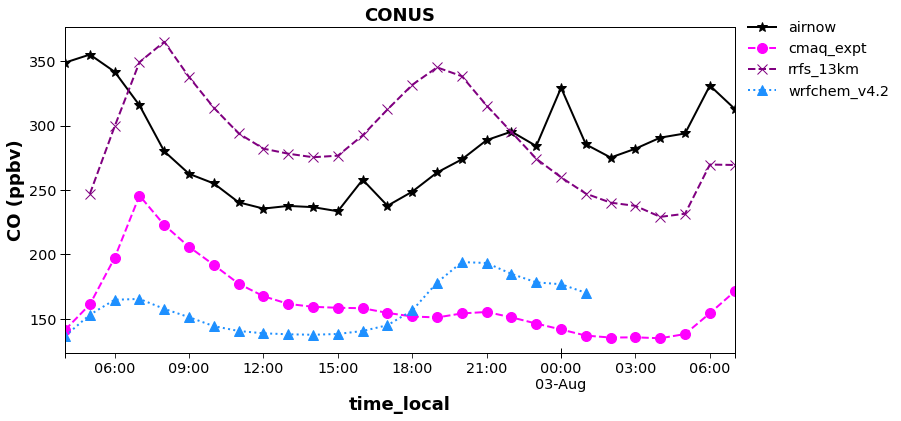

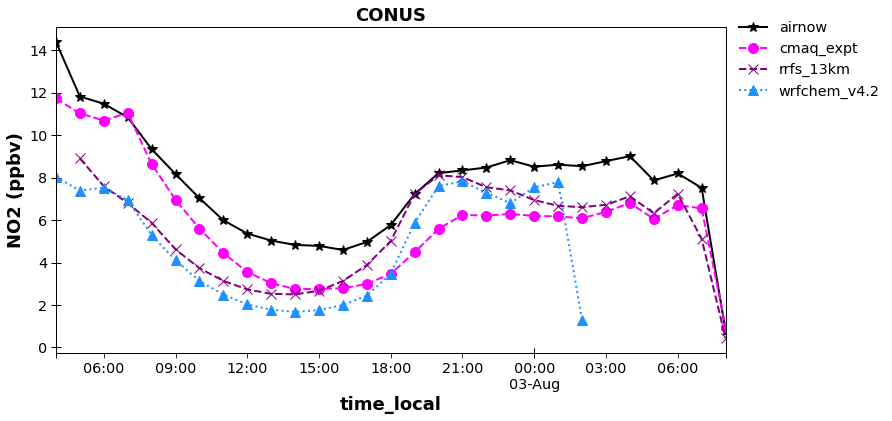

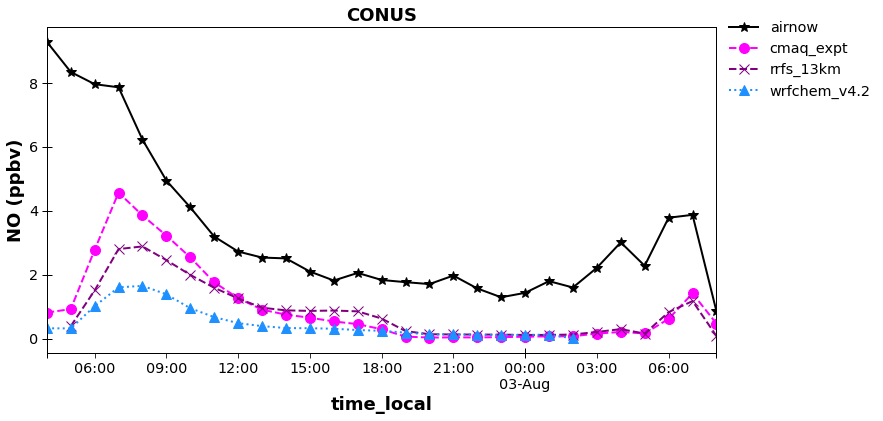

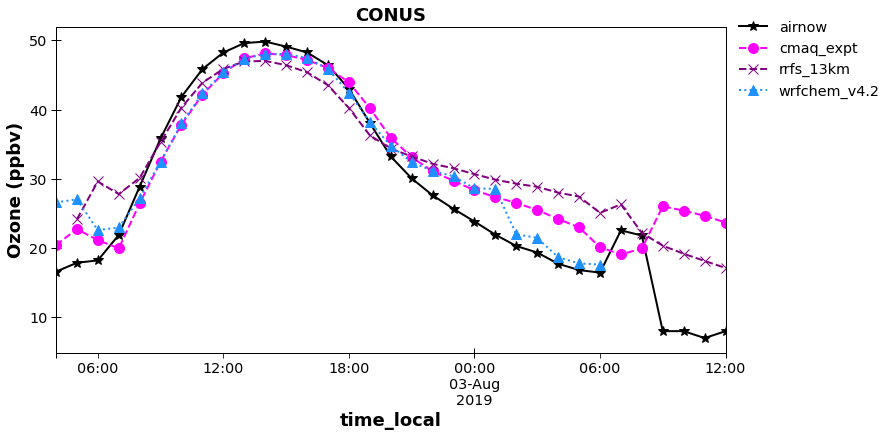

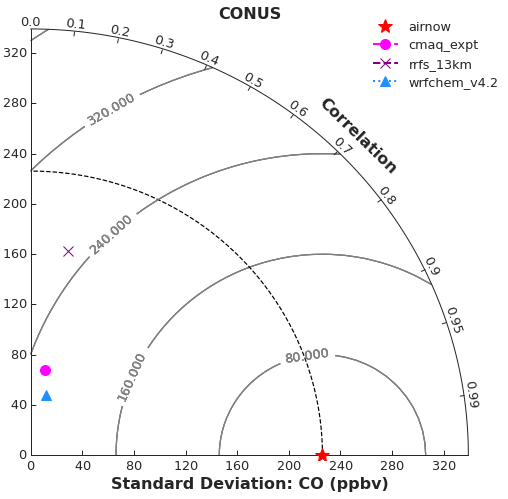

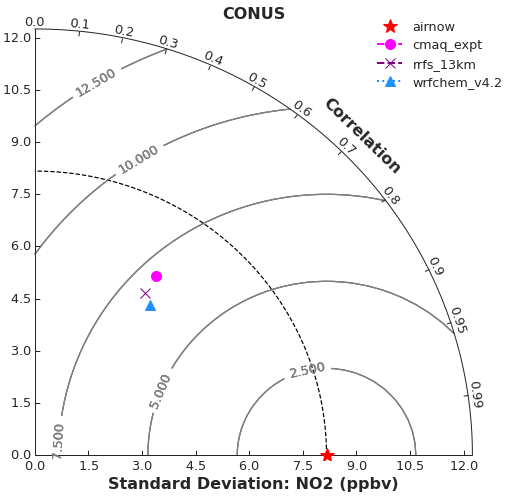

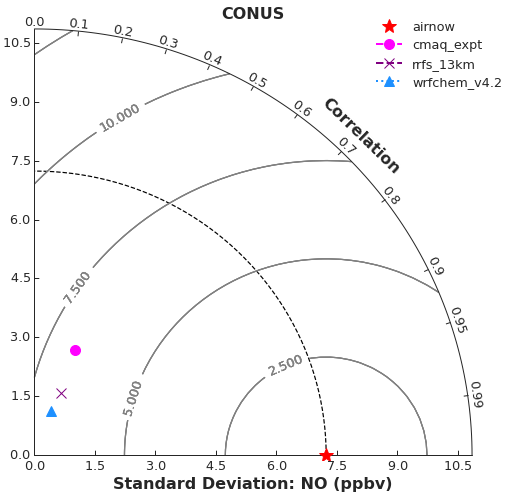

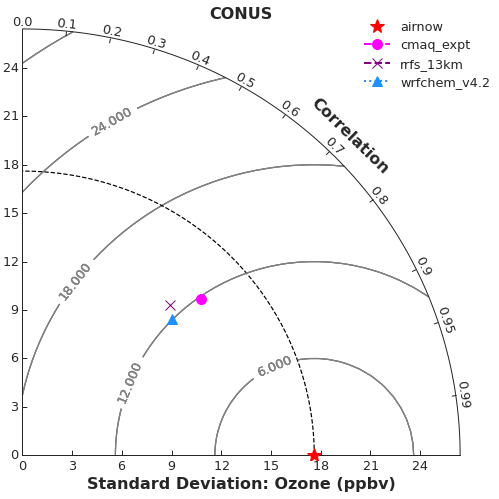

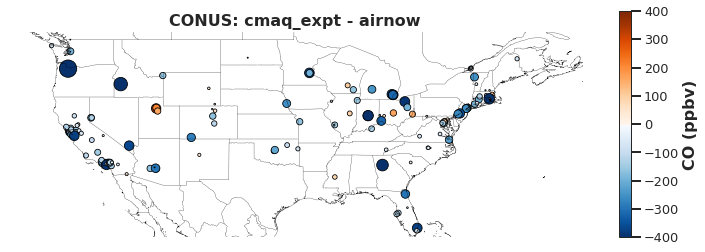

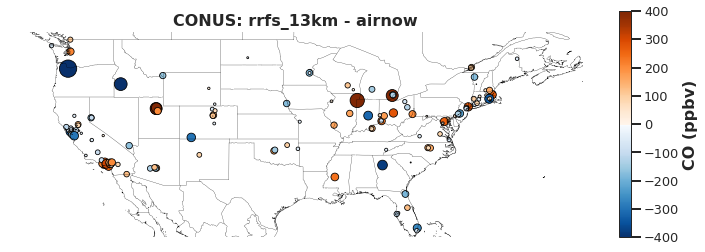

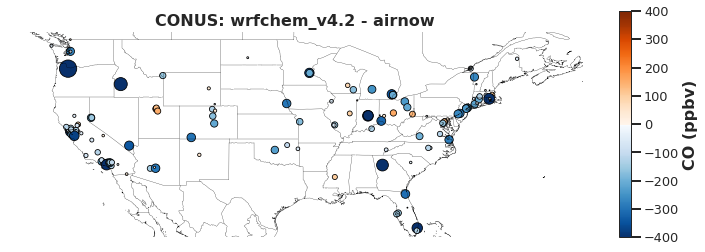

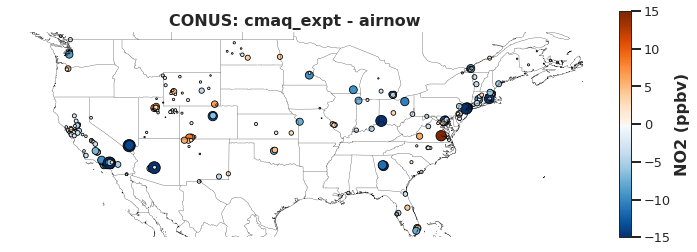

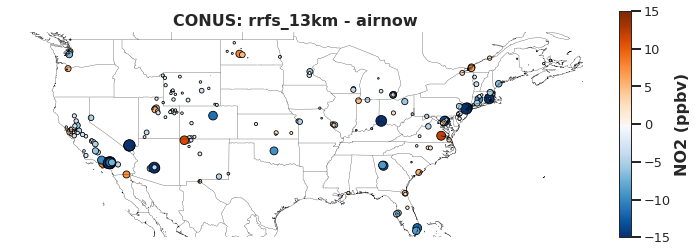

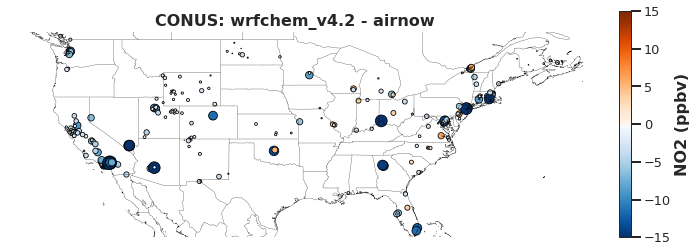

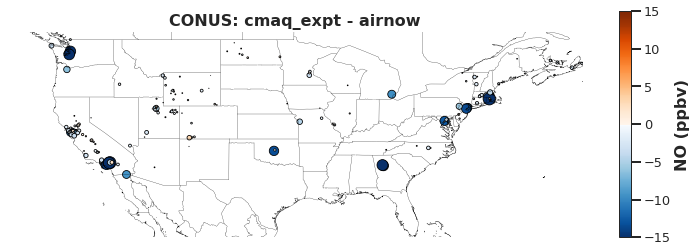

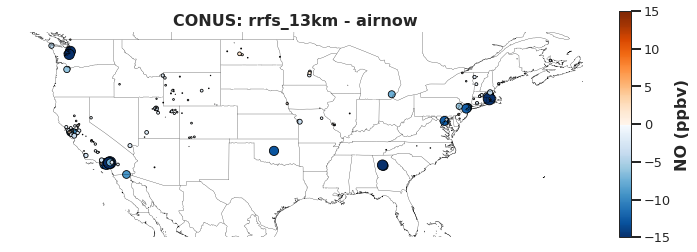

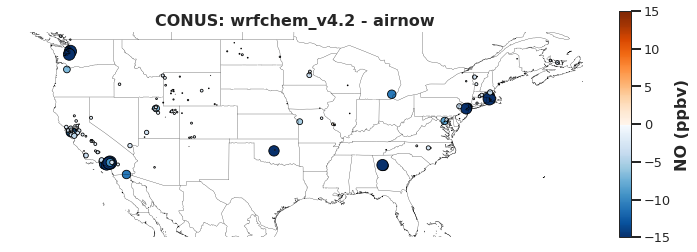

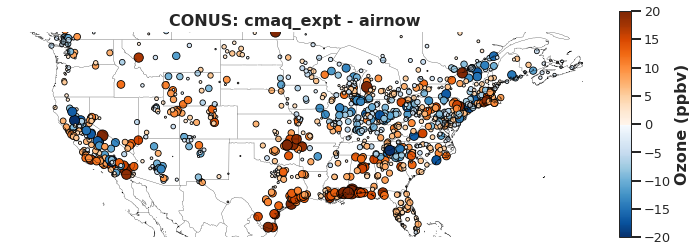

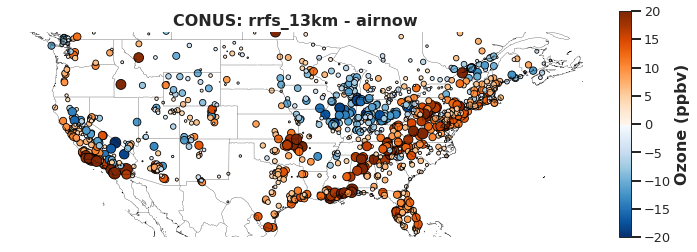

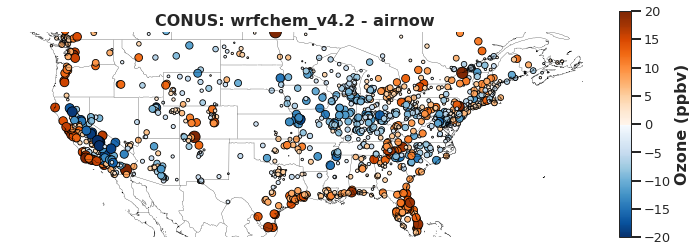

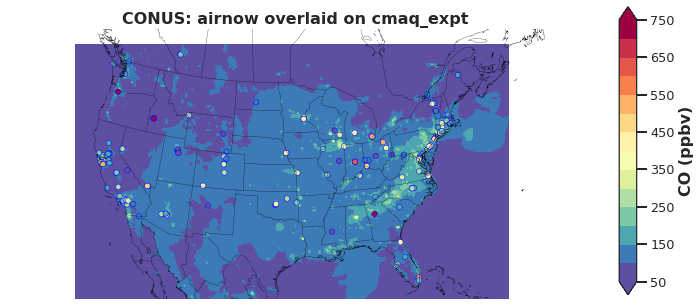

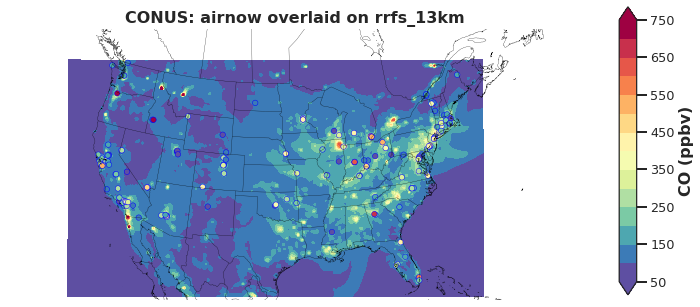

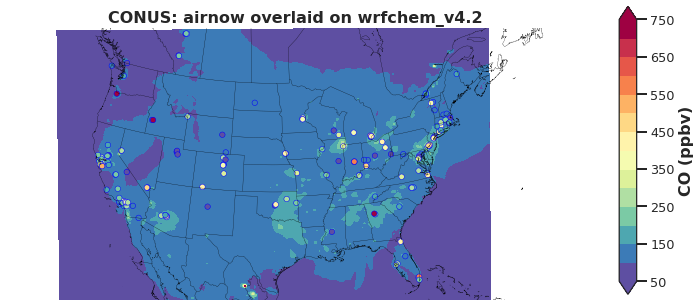

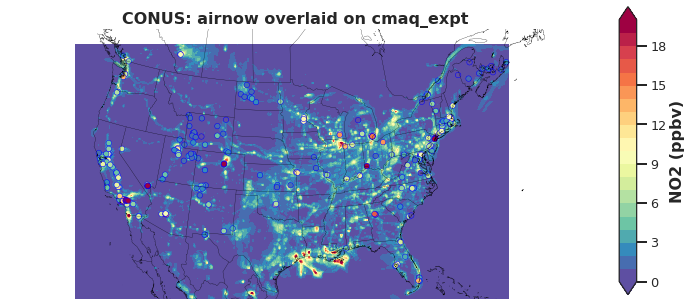

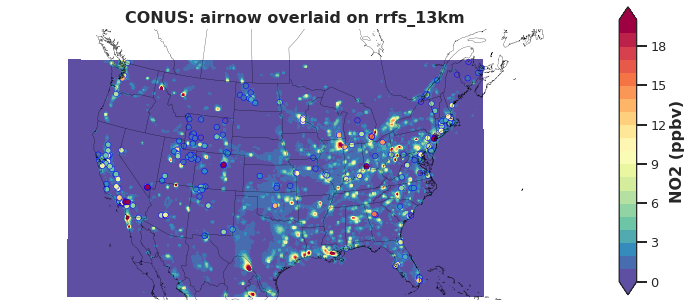

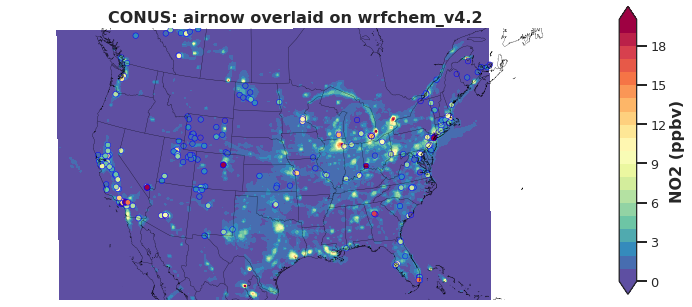

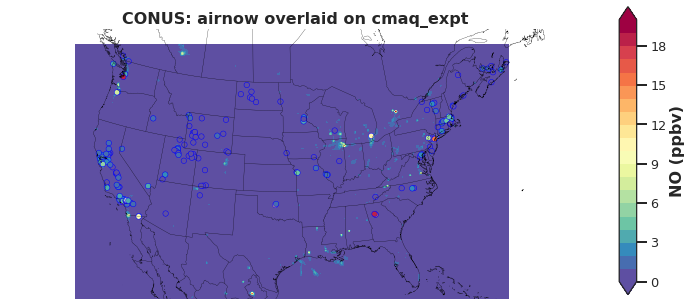

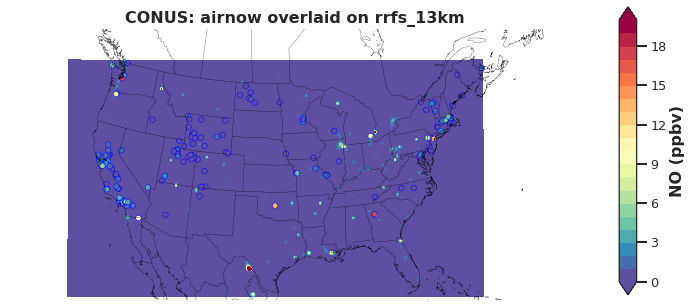

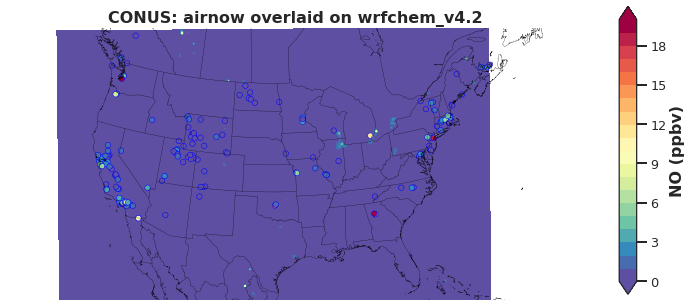

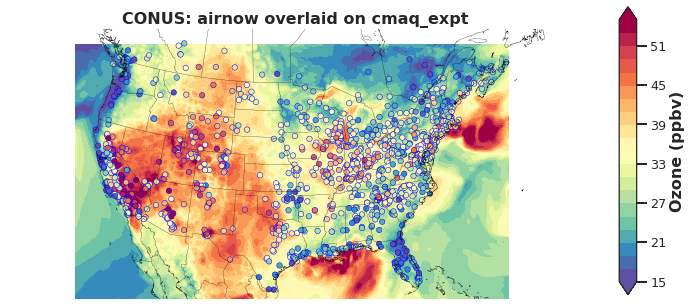

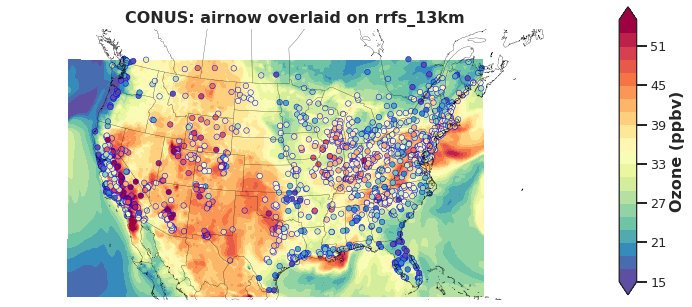

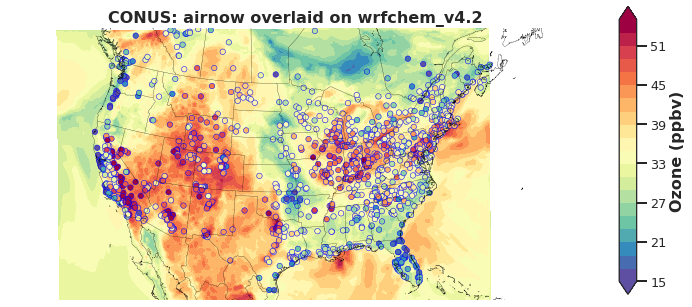

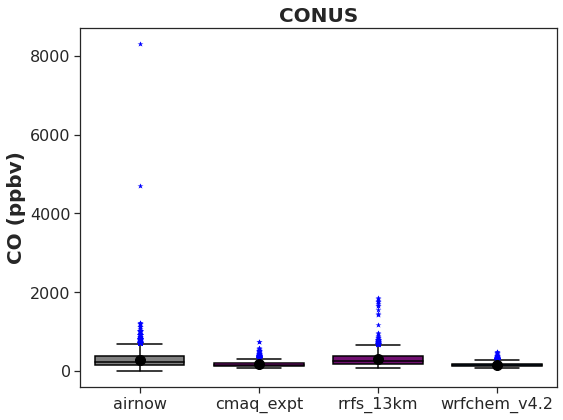

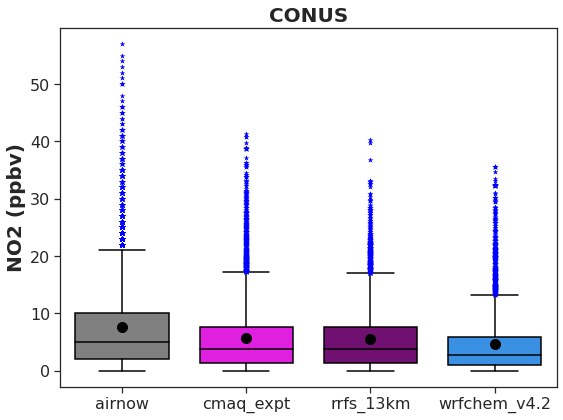

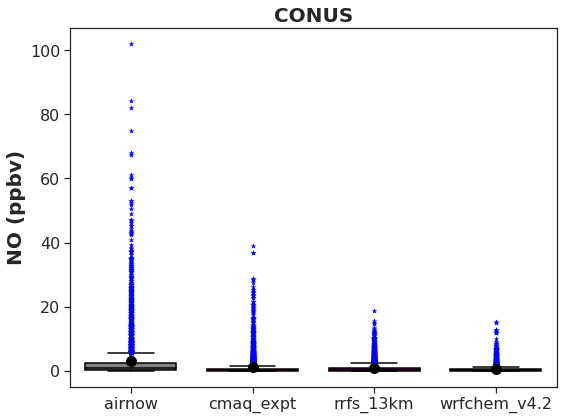

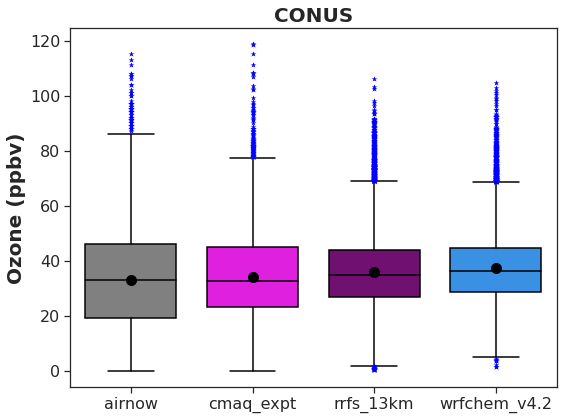

In [13]:
#And this generates all the plots.
an.plotting()

In [14]:
an.stats()

In [15]:
import monet 
import monetio 
import numpy as np

#Open the file
firex_data = '/scratch2/BMC/rcm1/rhs/obs/firex_20201209/merge_1s/firexaq-mrg01-dc8_merge_20190802_RL.ict'
ds=monetio.icartt.add_data(firex_data)

In [16]:
# rename latitude, longitude, and altitude
#Convert pressure into pa so similar to the model
df = ds.rename({'Latitude_YANG':'latitude',
                'Longitude_YANG':'longitude',
                'P_BUI':'pressure_obs'}).to_dataframe() #'time':'time_obs'

#Fill LLOD with 0 and ULOD with NaN and convert pressure units just once 
df['pressure_obs'] = df['pressure_obs']*100
df = df.replace(-777777,np.NaN)
df = df.replace(-888888,0.0)

#Resample the data
df = df.resample('360S').mean() #6 min so doesn't error. Can make this smaller if submitting a job.

In [17]:
df_obs = df[['latitude','longitude','pressure_obs','O3_CL_RYERSON','NO_CL_RYERSON',
            'NO2_CL_RYERSON','CO_LGR_ppb_PEISCHL']]

In [18]:
# do the facy trick to convert to get something useful for MONET
# this converts to dimensions of x and y
# you may want to make pressure / msl a coordinate too
new_ds = df.rename_axis('time_obs').reset_index().monet._df_to_da().set_coords(['time_obs','pressure_obs'])


In [19]:
new_ds

<xarray.Dataset>
Dimensions:                                       (x: 62, y: 1)
Coordinates:
  * x                                             (x) int64 0 1 2 3 ... 59 60 61
    time_obs                                      (y, x) datetime64[ns] 2019-...
    latitude                                      (y, x) float64 43.64 ... 43.55
    longitude                                     (y, x) float64 -116.3 ... -...
    pressure_obs                                  (y, x) float64 8.449e+04 .....
Dimensions without coordinates: y
Data variables: (12/628)
    Time_Stop                                     (y, x) float64 7.622e+04 .....
    Day_Of_Year_YANG                              (y, x) float64 214.0 ... 214.0
    MSL_GPS_Altitude_YANG                         (y, x) float64 1.561e+03 .....
    HAE_GPS_Altitude_YANG                         (y, x) float64 1.541e+03 .....
    Pressure_Altitude_YANG                        (y, x) float64 4.877e+03 .....
    Radar_Altitude_YANG                           (y, x) float64 2.391e+03 .....
    ...                                            ...
    smoke_age_HOLMES                              (y, x) float64 nan nan ... nan
    smoke_age_corr_HOLMES                         (y, x) float64 nan nan ... nan
    smoke_age_rise_HOLMES                         (y, x) float64 nan nan ... nan
    smoke_rise_HOLMES                             (y, x) float64 nan nan ... nan
    fire_distance_HOLMES                          (y, x) float64 nan nan ... nan
    smoke_agemethod_HOLMES                        (y, x) float64 nan nan ... nan

In [20]:
df['pressure_obs']

time
2019-08-02 21:06:00    84490.646146
2019-08-02 21:12:00    63377.423500
2019-08-02 21:18:00    52614.735417
2019-08-02 21:24:00    40385.804417
2019-08-02 21:30:00    31784.257556
                           ...     
2019-08-03 02:48:00    24041.540278
2019-08-03 02:54:00    36523.218333
2019-08-03 03:00:00    59599.291667
2019-08-03 03:06:00    75832.645000
2019-08-03 03:12:00    90199.275439
Freq: 360S, Name: pressure_obs, Length: 62, dtype: float64

In [21]:
#Nearest neighbor approach to find closest grid cell to each point.
ds_wrf = monet.util.combinetool.combine_da_to_da(an.models['wrfchem_v4.2'].obj,new_ds,merge=False)
ds_wrf = ds_wrf.interp(time=ds_wrf.time_obs.squeeze())
ds_wrf

<xarray.Dataset>
Dimensions:        (x: 62, y: 1, z: 50)
Coordinates:
    longitude      (y, x) float64 -116.3 -116.2 -116.1 ... -116.2 -116.2 -116.2
    pressure_obs   (y, x) float64 8.449e+04 6.338e+04 ... 7.583e+04 9.02e+04
    latitude       (y, x) float64 43.64 43.99 44.56 45.05 ... 44.19 43.7 43.55
    time           (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T03:1...
  * x              (x) int64 0 1 2 3 4 5 6 7 8 9 ... 53 54 55 56 57 58 59 60 61
    time_obs       (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T03:1...
Dimensions without coordinates: y, z
Data variables:
    o3             (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    co             (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    no             (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    no2            (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    pres_pa_mid    (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    alt_msl_m_mid  (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    temperature_k  (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    alt_agl_m_mid  (x, z, y) float32 dask.array<chunksize=(62, 50, 1), meta=np.ndarray>
    surfpres_pa    (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
Attributes:
    TRUELAT1:                  33.0
    TRUELAT2:                  45.0
    MOAD_CEN_LAT:              39.617638
    STAND_LON:                 -97.0
    MAP_PROJ:                  1
    CEN_LAT:                   39.617638
    CEN_LON:                   -97.77487
    proj4_srs:                 +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=39.61...
    mapping_tables_to_airnow:  {'OZONE': 'o3', 'PM2.5': 'PM2_5_DRY', 'PM10': ...

In [22]:
ds_cmaq = monet.util.combinetool.combine_da_to_da(an.models['cmaq_expt'].obj,new_ds,merge=False)
ds_cmaq = ds_cmaq.interp(time=ds_cmaq.time_obs.squeeze())
ds_cmaq

<xarray.Dataset>
Dimensions:         (x: 62, y: 1, z: 35)
Coordinates:
    longitude       (y, x) float64 -116.3 -116.2 -116.1 ... -116.2 -116.2 -116.2
    pressure_obs    (y, x) float64 8.449e+04 6.338e+04 ... 7.583e+04 9.02e+04
    latitude        (y, x) float64 43.64 43.99 44.56 45.05 ... 44.19 43.7 43.55
    time            (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T03:...
  * x               (x) int64 0 1 2 3 4 5 6 7 8 9 ... 53 54 55 56 57 58 59 60 61
    time_obs        (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T03:...
Dimensions without coordinates: y, z
Data variables: (12/178)
    O3              (x, z, y) float32 dask.array<chunksize=(62, 35, 1), meta=np.ndarray>
    CO              (x, z, y) float32 dask.array<chunksize=(62, 35, 1), meta=np.ndarray>
    SO2             (x, z, y) float32 dask.array<chunksize=(62, 35, 1), meta=np.ndarray>
    NO              (x, z, y) float32 dask.array<chunksize=(62, 35, 1), meta=np.ndarray>
    NO2             (x, z, y) float32 dask.array<chunksize=(62, 35, 1), meta=np.ndarray>
    NO3             (x, z, y) float32 dask.array<chunksize=(62, 35, 1), meta=np.ndarray>
    ...              ...
    VD_HONO         (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
    VD_CO           (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
    VD_METHANOL     (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
    VD_N2O5         (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
    VD_NO3          (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
    VD_GEN_ALD      (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
Attributes: (12/34)
    IOAPI_VERSION:  $Id:: init3.F 29 2014-08-07 14:31:02Z coats              ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2019215
    CTIME:          233544
    WDATE:          2019215
    ...             ...
    GDNAM:          AQF_CONUS_5x    
    UPNAM:          OPCONC          
    VAR-LIST:       O3              CO              SO2             NO       ...
    FILEDESC:       Concentration file output                                ...
    HISTORY:        
    proj4_srs:      +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=40.0 +lon_0=-97....

In [23]:
ds_rrfs = monet.util.combinetool.combine_da_to_da(an.models['rrfs_13km'].obj,new_ds,merge=False)
ds_rrfs = ds_rrfs.interp(time=ds_rrfs.time_obs.squeeze())
ds_rrfs

<xarray.Dataset>
Dimensions:         (x: 62, y: 1, z: 64)
Coordinates:
    longitude       (y, x) float64 -116.3 -116.2 -116.1 ... -116.2 -116.2 -116.2
    pressure_obs    (y, x) float64 8.449e+04 6.338e+04 ... 7.583e+04 9.02e+04
    latitude        (y, x) float64 43.64 43.99 44.56 45.05 ... 44.19 43.7 43.55
    time            (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T03:...
  * x               (x) int64 0 1 2 3 4 5 6 7 8 9 ... 53 54 55 56 57 58 59 60 61
    time_obs        (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T03:...
Dimensions without coordinates: y, z
Data variables:
    o3              (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    co              (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    no              (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    no2             (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    temperature_k   (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    surfpres_pa     (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
    dp_pa           (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    surfalt_m       (x, y) float32 dask.array<chunksize=(62, 1), meta=np.ndarray>
    dz_m            (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    pres_pa_mid     (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
    alt_msl_m_full  (x, z, y) float32 dask.array<chunksize=(62, 64, 1), meta=np.ndarray>
Attributes: (12/16)
    hydrostatic:  non-hydrostatic
    ncnsto:       194
    ak:           [2.0000000e+01 6.4247000e+01 1.3779000e+02 2.2195800e+02 3....
    bk:           [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0....
    source:       FV3GFS
    grid:         lambert_conformal
    ...           ...
    nx:           393
    ny:           225
    lon1:         -121.70231097
    lat1:         22.57417972
    dx:           13000.0
    dy:           13000.0

In [24]:
def resample_stratify(da, levels, vertical, axis=1,interpolation='linear',extrapolation='nan'):
    import stratify
    import xarray as xr

    result = stratify.interpolate(levels, vertical.chunk(), da.chunk(), axis=axis,
                                 interpolation = interpolation,extrapolation = extrapolation)
    dims = da.dims
    out = xr.DataArray(result, dims=dims)
    for i in dims:
        if i != "z":
            out[i] = da[i]
    out.attrs = da.attrs.copy()
    if len(da.coords) > 0:
        for i in da.coords:
            if i != "z":
                out.coords[i] = da.coords[i]
    return out

In [25]:
def vert_interp(ds_model,df_obs,var_name_list = ['o3','pres_pa_mid']):
    import xarray as xr
    from pandas import merge_asof, Series
    
    var_out_list = []
    for var_name in var_name_list:
        if var_name == 'pres_pa_mid':
            out = resample_stratify(ds_model[var_name],sorted(ds_model.pressure_obs.squeeze().values,reverse=True),
                                      ds_model['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
            #Use extrapolation nan for the pressure so that later you can assign the nan values to the pressure_obs value 
            #instead of the midpoint of the edge model cells. This is needed for the pairing later on.
        else:
            out = resample_stratify(ds_model[var_name],sorted(ds_model.pressure_obs.squeeze().values,reverse=True),
                                  ds_model['pres_pa_mid'],axis=1,
                                  interpolation='linear',extrapolation='nearest')
        out.name = var_name
        var_out_list.append(out)

    df_model = xr.merge(var_out_list).to_dataframe().reset_index()
    df_model.pres_pa_mid.fillna(df_model.pressure_obs,inplace=True)
    df_model.drop(labels=['x','y','z','pressure_obs','time_obs'], axis=1, inplace=True)
    df_model.rename(columns={'pres_pa_mid':'pressure_obs'}, inplace=True)
    
    final_df_model = merge_asof(df_obs, df_model, 
                            by=['latitude', 'longitude', 'pressure_obs'], 
                            on='time', direction='nearest')

    return final_df_model

In [26]:
ds_wrf['pres_pa_mid'].values.max()

[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.4s
[########################################] | 100% Completed |  2.4s
[########################################] | 100% Completed |  2.5s


92796.2140625

In [27]:
var_name_list = ['o3','no','no2','co','pres_pa_mid']
df_wrf = vert_interp(ds_wrf,df_obs,var_name_list)
df_wrf

[########################################] | 100% Completed |  1.9s
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.4s
[########################################] | 100% Completed |  2.4s
[########################################] | 100% Completed |  1.8s
[########################################] | 100% Completed |  1.9s
[########################################] | 100% Completed |  1.9s
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.0s
[########################################] | 100

latitude   longitude  pressure_obs                time  O3_CL_RYERSON  \
0   43.640390 -116.293116  84490.646146 2019-08-02 21:06:00      60.723620   
1   43.985582 -116.193801  63377.423500 2019-08-02 21:12:00      56.731250   
2   44.559467 -116.069573  52614.735417 2019-08-02 21:18:00      60.773869   
3   45.052128 -115.530464  40385.804417 2019-08-02 21:24:00      47.441092   
4   45.447756 -114.626168  31784.257556 2019-08-02 21:30:00      65.505881   
..        ...         ...           ...                 ...            ...   
57  45.558078 -116.326276  24041.540278 2019-08-03 02:48:00     113.140531   
58  44.812220 -116.275130  36523.218333 2019-08-03 02:54:00      85.714576   
59  44.188918 -116.233925  59599.291667 2019-08-03 03:00:00      60.068540   
60  43.703687 -116.188339  75832.645000 2019-08-03 03:06:00      51.903636   
61  43.553261 -116.187387  90199.275439 2019-08-03 03:12:00      55.969136   

    NO_CL_RYERSON  NO2_CL_RYERSON  CO_LGR_ppb_PEISCHL          o3        no  \
0             NaN             NaN          115.282663   49.308003  0.168585   
1             NaN       -0.366561           87.677500   49.206406  0.005222   
2             NaN       -0.357817           82.680139   51.896556  0.002917   
3             NaN       -0.383823           69.373472   60.743113  0.022505   
4             NaN       -0.661536           81.278571   67.326464  0.059551   
..            ...             ...                 ...         ...       ...   
57            NaN        0.173000          105.725000  124.281975  0.063996   
58            NaN        0.107912          103.884444   65.486143  0.016517   
59            NaN        0.057715           91.929167   49.184038  0.000529   
60            NaN        0.104435          101.068889   44.945128  0.001579   
61            NaN        2.006546          127.212281   36.805778  0.023592   

         no2          co  
0   0.611047  122.411118  
1   0.010001   94.669584  
2   0.004013   88.033664  
3   0.015970   78.496747  
4   0.020539   80.310915  
..       ...         ...  
57  0.091903   78.545405  
58  0.053528   79.614568  
59  0.008928   90.117718  
60  0.078718  101.426521  
61  4.600426  158.070377  

[62 rows x 12 columns]

In [28]:
var_name_list = ['O3','NO','NO2','CO','pres_pa_mid']
df_cmaq = vert_interp(ds_cmaq,df_obs,var_name_list)
df_cmaq

[########################################] | 100% Completed |  7.2s
[########################################] | 100% Completed |  7.3s
[########################################] | 100% Completed |  7.3s
[########################################] | 100% Completed |  7.4s
[########################################] | 100% Completed |  8.2s
[########################################] | 100% Completed |  8.3s
[########################################] | 100% Completed |  8.4s
[########################################] | 100% Completed |  8.5s
[########################################] | 100% Completed |  5.8s
[########################################] | 100% Completed |  5.9s
[########################################] | 100% Completed |  6.0s
[########################################] | 100% Completed |  6.1s
[########################################] | 100% Completed |  8.0s
[########################################] | 100% Completed |  8.1s
[########################################] | 100

latitude   longitude  pressure_obs                time  O3_CL_RYERSON  \
0   43.640390 -116.293116  84490.646146 2019-08-02 21:06:00      60.723620   
1   43.985582 -116.193801  63377.423500 2019-08-02 21:12:00      56.731250   
2   44.559467 -116.069573  52614.735417 2019-08-02 21:18:00      60.773869   
3   45.052128 -115.530464  40385.804417 2019-08-02 21:24:00      47.441092   
4   45.447756 -114.626168  31784.257556 2019-08-02 21:30:00      65.505881   
..        ...         ...           ...                 ...            ...   
57  45.558078 -116.326276  24041.540278 2019-08-03 02:48:00     113.140531   
58  44.812220 -116.275130  36523.218333 2019-08-03 02:54:00      85.714576   
59  44.188918 -116.233925  59599.291667 2019-08-03 03:00:00      60.068540   
60  43.703687 -116.188339  75832.645000 2019-08-03 03:06:00      51.903636   
61  43.553261 -116.187387  90199.275439 2019-08-03 03:12:00      55.969136   

    NO_CL_RYERSON  NO2_CL_RYERSON  CO_LGR_ppb_PEISCHL         O3  \
0             NaN             NaN          115.282663  51.038241   
1             NaN       -0.366561           87.677500  49.739345   
2             NaN       -0.357817           82.680139  49.093061   
3             NaN       -0.383823           69.373472  59.852425   
4             NaN       -0.661536           81.278571  78.527651   
..            ...             ...                 ...        ...   
57            NaN        0.173000          105.725000  96.539171   
58            NaN        0.107912          103.884444  76.887092   
59            NaN        0.057715           91.929167  50.135578   
60            NaN        0.104435          101.068889  45.302285   
61            NaN        2.006546          127.212281  43.088388   

              NO       NO2          CO  
0   1.134034e-01  0.463313  102.286363  
1   1.092768e-02  0.030173   94.755061  
2   1.832826e-03  0.002719   87.793745  
3   1.641015e-03  0.001495   75.552378  
4   2.310971e-03  0.001099   69.205383  
..           ...       ...         ...  
57  5.714657e-04  0.003349   64.809988  
58  9.523416e-05  0.002001   66.412781  
59  3.290869e-08  0.011992   78.779876  
60  3.935480e-08  0.157325   87.828527  
61  3.330348e-04  1.740531  103.617079  

[62 rows x 12 columns]

In [29]:
var_name_list = ['o3','no','no2','co','pres_pa_mid']
df_rrfs = vert_interp(ds_rrfs,df_obs,var_name_list)
df_rrfs

[########################################] | 100% Completed |  2.6s
[########################################] | 100% Completed |  2.7s
[########################################] | 100% Completed |  2.8s
[########################################] | 100% Completed |  2.9s
[########################################] | 100% Completed |  1.5s
[########################################] | 100% Completed |  1.6s
[########################################] | 100% Completed |  1.6s
[########################################] | 100% Completed |  1.7s
[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.4s
[########################################] | 100% Completed |  2.5s
[########################################] | 100% Completed |  1.6s
[########################################] | 100% Completed |  1.7s
[########################################] | 100

latitude   longitude  pressure_obs                time  O3_CL_RYERSON  \
0   43.640390 -116.293116  84490.646146 2019-08-02 21:06:00      60.723620   
1   43.985582 -116.193801  63377.423500 2019-08-02 21:12:00      56.731250   
2   44.559467 -116.069573  52614.735417 2019-08-02 21:18:00      60.773869   
3   45.052128 -115.530464  40385.804417 2019-08-02 21:24:00      47.441092   
4   45.447756 -114.626168  31784.257556 2019-08-02 21:30:00      65.505881   
..        ...         ...           ...                 ...            ...   
57  45.558078 -116.326276  24041.540278 2019-08-03 02:48:00     113.140531   
58  44.812220 -116.275130  36523.218333 2019-08-03 02:54:00      85.714576   
59  44.188918 -116.233925  59599.291667 2019-08-03 03:00:00      60.068540   
60  43.703687 -116.188339  75832.645000 2019-08-03 03:06:00      51.903636   
61  43.553261 -116.187387  90199.275439 2019-08-03 03:12:00      55.969136   

    NO_CL_RYERSON  NO2_CL_RYERSON  CO_LGR_ppb_PEISCHL         o3  \
0             NaN             NaN          115.282663  57.390829   
1             NaN       -0.366561           87.677500  40.591861   
2             NaN       -0.357817           82.680139  45.873745   
3             NaN       -0.383823           69.373472  57.596892   
4             NaN       -0.661536           81.278571  62.006177   
..            ...             ...                 ...        ...   
57            NaN        0.173000          105.725000  95.042133   
58            NaN        0.107912          103.884444  77.598396   
59            NaN        0.057715           91.929167  49.417742   
60            NaN        0.104435          101.068889  41.636512   
61            NaN        2.006546          127.212281  40.257376   

              no       no2          co  
0   1.715747e-01  0.584214  170.033254  
1   3.101758e-03  0.005572   90.842528  
2   1.535953e-03  0.002144   80.768158  
3   9.710479e-04  0.000716   69.620032  
4   1.787913e-03  0.001166   74.153345  
..           ...       ...         ...  
57  4.868373e-04  0.003549   64.754860  
58  6.972934e-05  0.001849   66.439287  
59  8.221137e-09  0.012356   83.961269  
60  9.306164e-09  0.047523   96.847235  
61  1.822273e-04  2.429504  161.604560  

[62 rows x 12 columns]

In [30]:
df_rrfs['pressure_obs_kpa'] = df_rrfs['pressure_obs']/1000. #Convert to kpa for plotting.
df_wrf['pressure_obs_kpa'] = df_wrf['pressure_obs']/1000. #Convert to kpa for plotting.
df_cmaq['pressure_obs_kpa'] = df_cmaq['pressure_obs']/1000. #Convert to kpa for plotting.

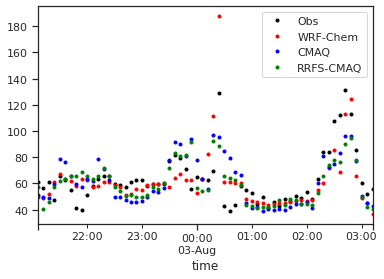

In [31]:
ax = df_wrf.plot(x='time',y='O3_CL_RYERSON',marker='.',color='black',linewidth=0,label='Obs')
ax = df_wrf.plot(x='time',y='o3',marker='.',color='red',linewidth=0,label='WRF-Chem',ax=ax)
ax = df_cmaq.plot(x='time',y='O3',marker='.',color='blue',linewidth=0,label='CMAQ',ax=ax)
ax = df_rrfs.plot(x='time',y='o3',marker='.',color='green',linewidth=0,label='RRFS-CMAQ',ax=ax)

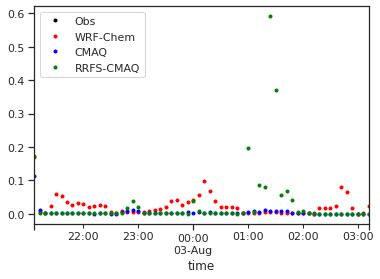

In [32]:
ax = df_wrf.plot(x='time',y='NO_CL_RYERSON',marker='.',color='black',linewidth=0,label='Obs')
ax = df_wrf.plot(x='time',y='no',marker='.',color='red',linewidth=0,label='WRF-Chem',ax=ax)
ax = df_cmaq.plot(x='time',y='NO',marker='.',color='blue',linewidth=0,label='CMAQ',ax=ax)
ax = df_rrfs.plot(x='time',y='no',marker='.',color='green',linewidth=0,label='RRFS-CMAQ',ax=ax)
#This is all NAN so not very useful for the obs. Need to pick a diffent day. Or maybe switch to LIF instrument.
#NO_LIF_ROLLINS,  pptv

(0.0, 1.0)

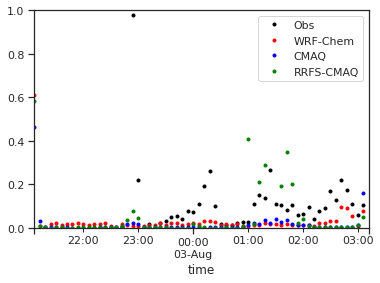

In [33]:
ax = df_wrf.plot(x='time',y='NO2_CL_RYERSON',marker='.',color='black',linewidth=0,label='Obs')
ax = df_wrf.plot(x='time',y='no2',marker='.',color='red',linewidth=0,label='WRF-Chem',ax=ax)
ax = df_cmaq.plot(x='time',y='NO2',marker='.',color='blue',linewidth=0,label='CMAQ',ax=ax)
ax = df_rrfs.plot(x='time',y='no2',marker='.',color='green',linewidth=0,label='RRFS-CMAQ',ax=ax)
ax.set_ylim([0,1])

(0.0, 200.0)

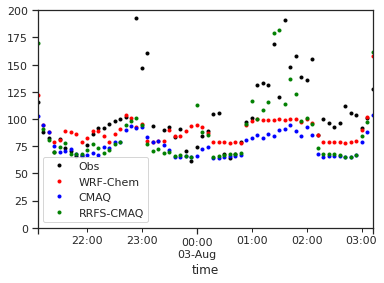

In [34]:
ax = df_wrf.plot(x='time',y='CO_LGR_ppb_PEISCHL',marker='.',color='black',linewidth=0,label='Obs')
ax = df_wrf.plot(x='time',y='co',marker='.',color='red',linewidth=0,label='WRF-Chem',ax=ax)
ax = df_cmaq.plot(x='time',y='CO',marker='.',color='blue',linewidth=0,label='CMAQ',ax=ax)
ax = df_rrfs.plot(x='time',y='co',marker='.',color='green',linewidth=0,label='RRFS-CMAQ',ax=ax)
ax.set_ylim([0,200])

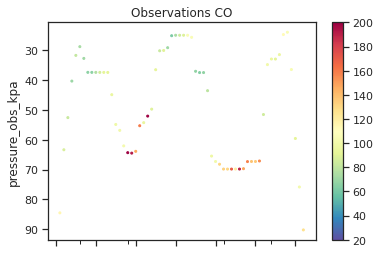

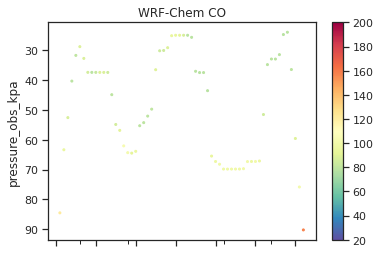

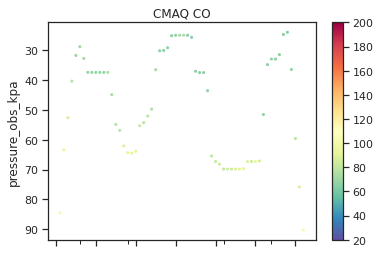

In [35]:
df_wrf.plot.scatter(x='time',y='pressure_obs_kpa',c=df_wrf['CO_LGR_ppb_PEISCHL'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='Observations CO',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()
df_wrf.plot.scatter(x='time',y='pressure_obs_kpa',c=df_wrf['co'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='WRF-Chem CO',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()
df_cmaq.plot.scatter(x='time',y='pressure_obs_kpa',c=df_cmaq['CO'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='CMAQ CO',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()
df_rrfs.plot.scatter(x='time',y='pressure_obs_kpa',c=df_rrfs['co'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='RRFS CO',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()

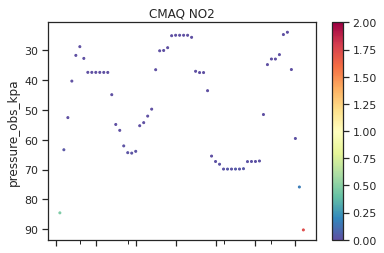

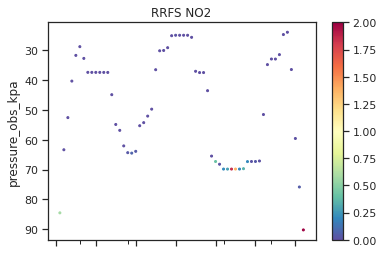

In [36]:
df_wrf.plot.scatter(x='time',y='pressure_obs_kpa',c=df_wrf['NO2_CL_RYERSON'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='Observations NO2',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 0, vmax = 2).invert_yaxis()
df_wrf.plot.scatter(x='time',y='pressure_obs_kpa',c=df_wrf['no2'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='WRF-Chem NO2',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 0, vmax = 2).invert_yaxis()
df_cmaq.plot.scatter(x='time',y='pressure_obs_kpa',c=df_cmaq['NO2'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='CMAQ NO2',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 0, vmax = 2).invert_yaxis()
df_rrfs.plot.scatter(x='time',y='pressure_obs_kpa',c=df_rrfs['no2'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='RRFS NO2',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 0, vmax = 2).invert_yaxis()

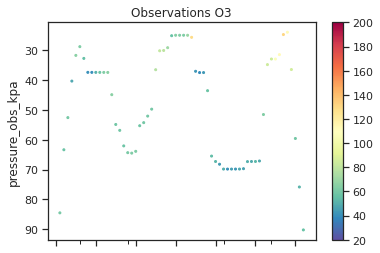

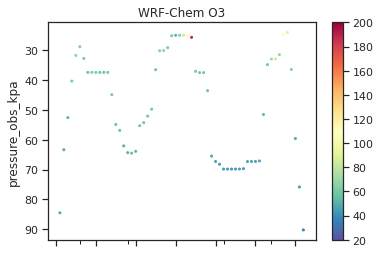

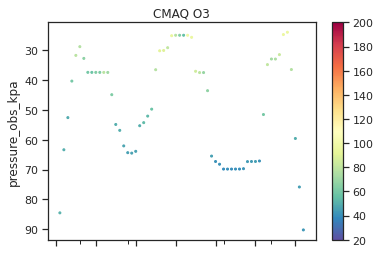

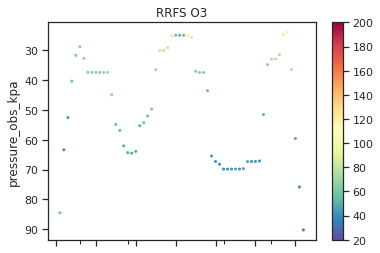

In [37]:
df_wrf.plot.scatter(x='time',y='pressure_obs_kpa',c=df_wrf['O3_CL_RYERSON'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='Observations O3',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()
df_wrf.plot.scatter(x='time',y='pressure_obs_kpa',c=df_wrf['o3'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='WRF-Chem O3',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()
df_cmaq.plot.scatter(x='time',y='pressure_obs_kpa',c=df_cmaq['O3'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='CMAQ O3',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()
df_rrfs.plot.scatter(x='time',y='pressure_obs_kpa',c=df_rrfs['o3'],s=4.0,
                    colorbar=True,colormap='Spectral_r',title='RRFS O3',
                    ylabel='Pressure (pa)',xlabel='time',
                   vmin = 20, vmax = 200).invert_yaxis()

In [38]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_wrf['o3'],target_pressures,
                                      ds_wrf['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'o3'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')
ds_wrf_const

[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.4s
[########################################] | 100% Completed |  2.5s
[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.4s
[########################################] | 100% Completed |  2.5s


<xarray.Dataset>
Dimensions:           (x: 62, y: 1, z: 134)
Coordinates:
    time              (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T0...
    time_obs          (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T0...
  * x                 (x) int64 0 1 2 3 4 5 6 7 8 ... 53 54 55 56 57 58 59 60 61
  * y                 (y) int64 0
    pressure_obs      (y, x) float64 8.449e+04 6.338e+04 ... 7.583e+04 9.02e+04
    latitude          (y, x) float64 43.64 43.99 44.56 ... 44.19 43.7 43.55
    longitude         (y, x) float64 -116.3 -116.2 -116.1 ... -116.2 -116.2
    target_pressures  (z) float64 9.05e+04 9e+04 8.95e+04 ... 2.45e+04 2.4e+04
Dimensions without coordinates: z
Data variables:
    o3                (x, z, y) float64 49.66 49.65 49.65 ... 83.36 85.81 88.41

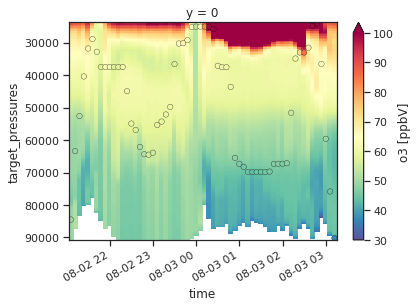

In [39]:
ax = ds_wrf_const['o3'].squeeze().plot(x='time',y='target_pressures',vmin=30,vmax=100,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_wrf.time.values,df_wrf.pressure_obs.values,c=df_wrf['o3'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 30, vmax = 100)

In [40]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_wrf['co'],target_pressures,
                                      ds_wrf['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'co'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')
ds_wrf_const

[########################################] | 100% Completed |  1.9s
[########################################] | 100% Completed |  1.9s
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.4s


<xarray.Dataset>
Dimensions:           (x: 62, y: 1, z: 134)
Coordinates:
    time              (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T0...
    time_obs          (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T0...
  * x                 (x) int64 0 1 2 3 4 5 6 7 8 ... 53 54 55 56 57 58 59 60 61
  * y                 (y) int64 0
    pressure_obs      (y, x) float64 8.449e+04 6.338e+04 ... 7.583e+04 9.02e+04
    latitude          (y, x) float64 43.64 43.99 44.56 ... 44.19 43.7 43.55
    longitude         (y, x) float64 -116.3 -116.2 -116.1 ... -116.2 -116.2
    target_pressures  (z) float64 9.05e+04 9e+04 8.95e+04 ... 2.45e+04 2.4e+04
Dimensions without coordinates: z
Data variables:
    co                (x, z, y) float64 125.6 125.3 124.9 ... 78.3 78.24 78.16

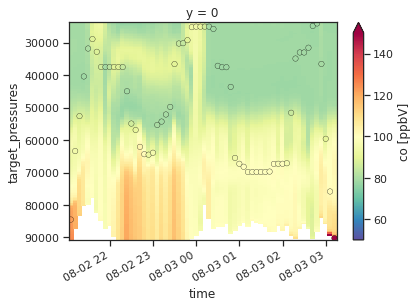

In [41]:
ax = ds_wrf_const['co'].squeeze().plot(x='time',y='target_pressures',vmin=50,vmax=150,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_wrf.time.values,df_wrf.pressure_obs.values,c=df_wrf['co'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 50, vmax = 150)

In [42]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_wrf['no2'],target_pressures,
                                      ds_wrf['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'no2'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')
ds_wrf_const

[########################################] | 100% Completed |  1.9s
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.3s


<xarray.Dataset>
Dimensions:           (x: 62, y: 1, z: 134)
Coordinates:
    time              (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T0...
    time_obs          (x) datetime64[ns] 2019-08-02T21:06:00 ... 2019-08-03T0...
  * x                 (x) int64 0 1 2 3 4 5 6 7 8 ... 53 54 55 56 57 58 59 60 61
  * y                 (y) int64 0
    pressure_obs      (y, x) float64 8.449e+04 6.338e+04 ... 7.583e+04 9.02e+04
    latitude          (y, x) float64 43.64 43.99 44.56 ... 44.19 43.7 43.55
    longitude         (y, x) float64 -116.3 -116.2 -116.1 ... -116.2 -116.2
    target_pressures  (z) float64 9.05e+04 9e+04 8.95e+04 ... 2.45e+04 2.4e+04
Dimensions without coordinates: z
Data variables:
    no2               (x, z, y) float64 0.9656 0.9217 0.8817 ... 0.1064 0.1117

In [43]:
ax = ds_wrf_const['no2'].squeeze().plot(x='time',y='target_pressures',vmin=0,vmax=1,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_wrf.time.values,df_wrf.pressure_obs.values,c=df_wrf['no2'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 0, vmax = 1)

[########################################] | 100% Completed |  5.6s
[########################################] | 100% Completed |  5.7s
[########################################] | 100% Completed |  5.8s
[########################################] | 100% Completed |  5.9s
[########################################] | 100% Completed |  6.9s
[########################################] | 100% Completed |  7.0s
[########################################] | 100% Completed |  7.1s
[########################################] | 100% Completed |  7.2s


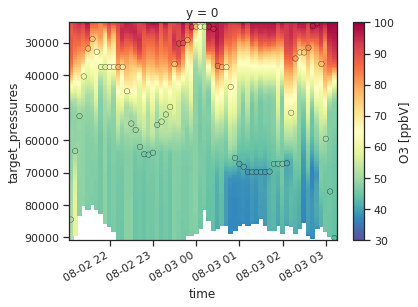

In [44]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_cmaq['O3'],target_pressures,
                                      ds_cmaq['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'O3'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')

ax = ds_wrf_const['O3'].squeeze().plot(x='time',y='target_pressures',vmin=30,vmax=100,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_cmaq.time.values,df_cmaq.pressure_obs.values,c=df_cmaq['O3'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 30, vmax = 100)

[########################################] | 100% Completed |  4.7s
[########################################] | 100% Completed |  4.8s
[########################################] | 100% Completed |  4.9s
[########################################] | 100% Completed |  5.0s
[########################################] | 100% Completed |  6.3s
[########################################] | 100% Completed |  6.4s
[########################################] | 100% Completed |  6.4s
[########################################] | 100% Completed |  6.5s


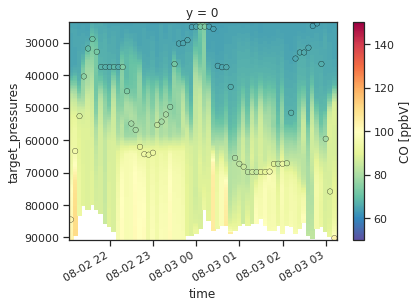

In [45]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_cmaq['CO'],target_pressures,
                                      ds_cmaq['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'CO'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')

ax = ds_wrf_const['CO'].squeeze().plot(x='time',y='target_pressures',vmin=50,vmax=150,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_cmaq.time.values,df_cmaq.pressure_obs.values,c=df_cmaq['CO'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 50, vmax = 150)

[########################################] | 100% Completed |  5.0s
[########################################] | 100% Completed |  5.1s
[########################################] | 100% Completed |  5.2s
[########################################] | 100% Completed |  5.2s
[########################################] | 100% Completed |  6.0s
[########################################] | 100% Completed |  6.1s
[########################################] | 100% Completed |  6.2s
[########################################] | 100% Completed |  6.3s


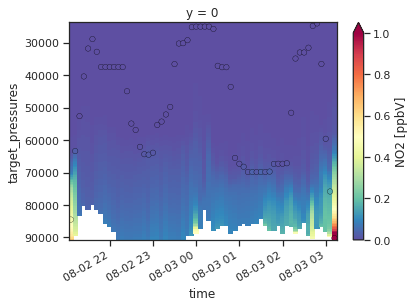

In [46]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_cmaq['NO2'],target_pressures,
                                      ds_cmaq['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'NO2'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')

ax = ds_wrf_const['NO2'].squeeze().plot(x='time',y='target_pressures',vmin=0,vmax=1,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_cmaq.time.values,df_cmaq.pressure_obs.values,c=df_cmaq['NO2'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 0, vmax = 1)

[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.4s
[########################################] | 100% Completed |  2.4s
[########################################] | 100% Completed |  1.0s
[########################################] | 100% Completed |  1.1s
[########################################] | 100% Completed |  1.1s
[########################################] | 100% Completed |  1.2s


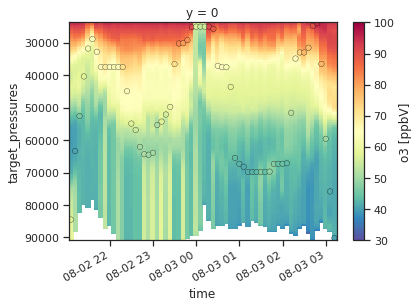

In [47]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_rrfs['o3'],target_pressures,
                                      ds_rrfs['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'o3'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')

ax = ds_wrf_const['o3'].squeeze().plot(x='time',y='target_pressures',vmin=30,vmax=100,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_cmaq.time.values,df_cmaq.pressure_obs.values,c=df_rrfs['o3'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 30, vmax = 100)

[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.8s


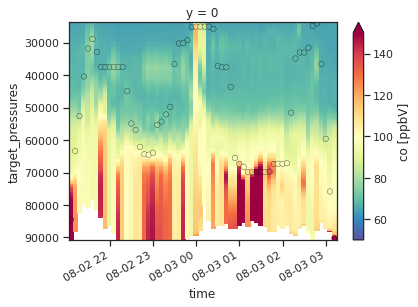

In [48]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_rrfs['co'],target_pressures,
                                      ds_rrfs['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'co'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')

ax = ds_wrf_const['co'].squeeze().plot(x='time',y='target_pressures',vmin=50,vmax=150,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_cmaq.time.values,df_cmaq.pressure_obs.values,c=df_rrfs['co'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 50, vmax = 150)

[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  2.4s
[########################################] | 100% Completed |  1.0s
[########################################] | 100% Completed |  1.1s
[########################################] | 100% Completed |  1.2s
[########################################] | 100% Completed |  1.2s


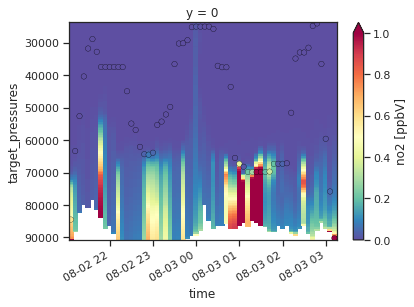

In [49]:
import numpy as np
import xarray as xr
#So let's to a vertical cross section along the flight tracks. 
#First you have to calculate the vertical direction.
target_pressures = np.linspace(90500,24000,134)
da_wrf_const = resample_stratify(ds_rrfs['no2'],target_pressures,
                                      ds_rrfs['pres_pa_mid'],axis=1,
                                      interpolation='linear',extrapolation='nan')
da_wrf_const.name = 'no2'
da_target_pressures = xr.DataArray(target_pressures, dims=('z'))
da_target_pressures.name = 'target_pressures'
ds_wrf_const = xr.merge([da_wrf_const,da_target_pressures])
ds_wrf_const = ds_wrf_const.set_coords('target_pressures')

ax = ds_wrf_const['no2'].squeeze().plot(x='time',y='target_pressures',vmin=0,vmax=1,
                                       yincrease=False,cmap='Spectral_r')
ax.axes.scatter(df_cmaq.time.values,df_cmaq.pressure_obs.values,c=df_rrfs['no2'],s=30.0,
                    edgecolor='black',linewidth=.3,
                    cmap='Spectral_r',
                    vmin = 0, vmax = 1)